### K mean clustering (Tugas 5)

In [ ]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datamining/tugas/data/Iris.csv')

In [ ]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

### Hitung Data

In [ ]:
# delete 'variety' column
df_without_label = df.drop(columns=["Species"])
df_without_label

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
# separate target 

# values
X=df.iloc[:,0:4].values

# 
y = df.values[:,4]

In [ ]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y)

In [ ]:
labels

array([ 1,  1,  1,  1,  1,  3,  2,  1,  1,  0,  1,  1,  0,  0,  1,  3,  3,
        2,  2,  2,  1,  3,  1,  4,  1,  1,  3,  1,  1,  1,  1,  3,  0,  1,
        0,  1,  1,  0,  1,  1,  2,  2,  1,  5,  3,  2,  1,  1,  1,  1, 10,
       11, 11,  9, 11,  9, 12,  6,  9, 10,  6, 11,  6, 10,  9, 10, 11,  6,
       11,  7, 14,  9, 11,  8,  9, 10, 10, 13, 11,  6,  7,  6,  8, 12, 11,
       12, 11,  9,  9,  9,  8, 10,  8,  6,  9,  8,  9,  9,  7,  9, 21, 15,
       17, 14, 18, 17, 13, 14, 14, 21, 16, 15, 17, 16, 20, 19, 14, 18, 19,
       11, 19, 16, 16, 14, 17, 14, 14, 14, 17, 12, 15, 16, 18, 11, 10, 19,
       20, 14, 14, 17, 20, 19, 15, 19, 21, 19, 15, 16, 19, 14])

In [ ]:
# data_tes = np.array(labels)
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=1)
kmeans.fit(X)
# kmeans.labels_
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

In [ ]:
centroids


array([[ 78.        ,   5.97818182,   2.78909091,   4.38909091],
       [ 25.5       ,   5.006     ,   3.418     ,   1.464     ],
       [128.        ,   6.60888889,   2.97333333,   5.53777778]])

In [ ]:
df = pd.DataFrame(labels, columns=["Label"])

In [ ]:
df

,Label
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
# pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [ ]:
X_new


array([[ 7.45410531e+01,  4.08041966e-01, -1.67187891e-01,
         4.14697917e-02],
       [ 7.35425448e+01,  2.74103351e-01,  3.25415580e-01,
        -1.38484168e-01],
       [ 7.25503976e+01,  4.34741494e-02,  2.37038467e-01,
         7.28060752e-02],
       [ 7.15449425e+01,  1.25559589e-01,  4.24436500e-01,
         1.57682231e-01],
       [ 7.05457903e+01,  2.03177345e-01, -2.20286071e-01,
         1.55865750e-01],
       [ 6.95315089e+01,  6.24870481e-01, -5.83114959e-01,
         1.97857830e-01],
       [ 6.85519476e+01, -7.78343360e-02,  1.36604362e-01,
         2.90968715e-01],
       [ 6.75436439e+01,  1.78388337e-01, -5.30131127e-02,
         6.35510717e-02],
       [ 6.65541830e+01, -2.49529805e-01,  6.22204564e-01,
         1.07530662e-01],
       [ 6.55453069e+01,  5.56046511e-02,  2.22053501e-01,
        -6.25902272e-02],
       [ 6.45416017e+01,  2.68973939e-01, -5.23459456e-01,
        -2.70959953e-02],
       [ 6.35457663e+01,  8.16806801e-03,  5.70863707e-02,
      

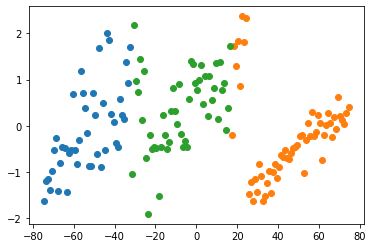

In [ ]:
# retrieve unique clusters
clusters = unique(labels)
# fit the model
kmeans.fit(X)
# assign a cluster to each example
yhat = kmeans.predict(X)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1])
# show the plot
pyplot.show()